In [1]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth

In [2]:
from tqdm import tqdm
import numpy as np

In [19]:
#Simple apriori for k=3
def load_transaction(data_path,type_=None):
        transactions=[]
        with open(data_path,'r') as data_file:
            for lines in tqdm(data_file):
                if(type_==2):
                    transactions_list=list(lines.strip('-2\n').split('-1'))
                else:
                    transactions_list=list(lines.strip().split())
                
                transactions_list=[int(x) for x in transactions_list if x is not ' ']

                transactions_list=list(np.unique(transactions_list))
                transactions_list.sort()
                transactions.append(transactions_list)

        return transactions


In [20]:
transactions=load_transaction('bwv_data_2.txt',2)

77512it [00:00, 77911.13it/s]


In [21]:
te=TransactionEncoder()
encoded_te=te.fit(transactions).transform(transactions)
df=pd.DataFrame(encoded_te,columns=te.columns_)

In [57]:
apriori(df,min_support=0.04,use_colnames=True)

,support,itemsets
0,0.048586,(55267)
1,0.044083,(55323)


In [58]:
fpgrowth(df, min_support=0.04,use_colnames=True)

,support,itemsets
0,0.044083,(55323)
1,0.048586,(55267)


In [33]:
min_thresh=[0.01, 0.05, 0.1, 0.5, 1]
library_apriori=[]
from time import time
for thresh in tqdm(min_thresh):
    start=time()
    res=apriori(df,min_support=thresh,use_colnames=True)
    end=time()
    library_apriori.append(end-start)

100%|████████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.41it/s]


In [67]:
min_thresh=[0.001,0.01,0.05,0.1,0.5,0.95,1]
library_fp=[]
from time import time
for thresh in tqdm(min_thresh):
    start=time()
    res=fpgrowth(df, min_support=thresh,use_colnames=True)
    end=time()
    library_fp.append(end-start)

100%|████████████████████████████████████████████████████████████████████| 7/7 [00:06<00:00,  1.03it/s]


In [68]:
library_fp

[2.727998733520508,
 0.9069375991821289,
 0.6270380020141602,
 0.6419644355773926,
 0.6100003719329834,
 0.6520016193389893,
 0.6179986000061035]

# Apriori

In [44]:
library_apriori

[2.2540292739868164,
 0.32204651832580566,
 0.3220033645629883,
 0.3230323791503906,
 0.3250007629394531]

In [50]:
time_taken_hash=[18.459999799728394,
 1.5090014934539795,
 0.19800019264221191,
 0.2090005874633789,
 0.2016148567199707]

In [51]:
tr_red=[565.9829444885254,
 303.314747095108,
 301.520039319992,
 394.3389348983765,
 295.3402712345123,]

In [13]:
new_redc=[]
new_redc.append(1590)
for it in tr_red:
    new_redc.append(it)
    

new_redc2=[]
for i in new_redc:
    new_redc2.append(i-1180)

In [71]:
library_fp=[2.727998733520508,
 0.9069375991821289,
 0.6270380020141602,
 0.6419644355773926,
 0.6100003719329834,]

In [72]:
fp_top_down=[8.054324626922607,
 1.396963119506836,
 0.14299821853637695,
 0.10703396797180176,
 0.09696149826049805,]

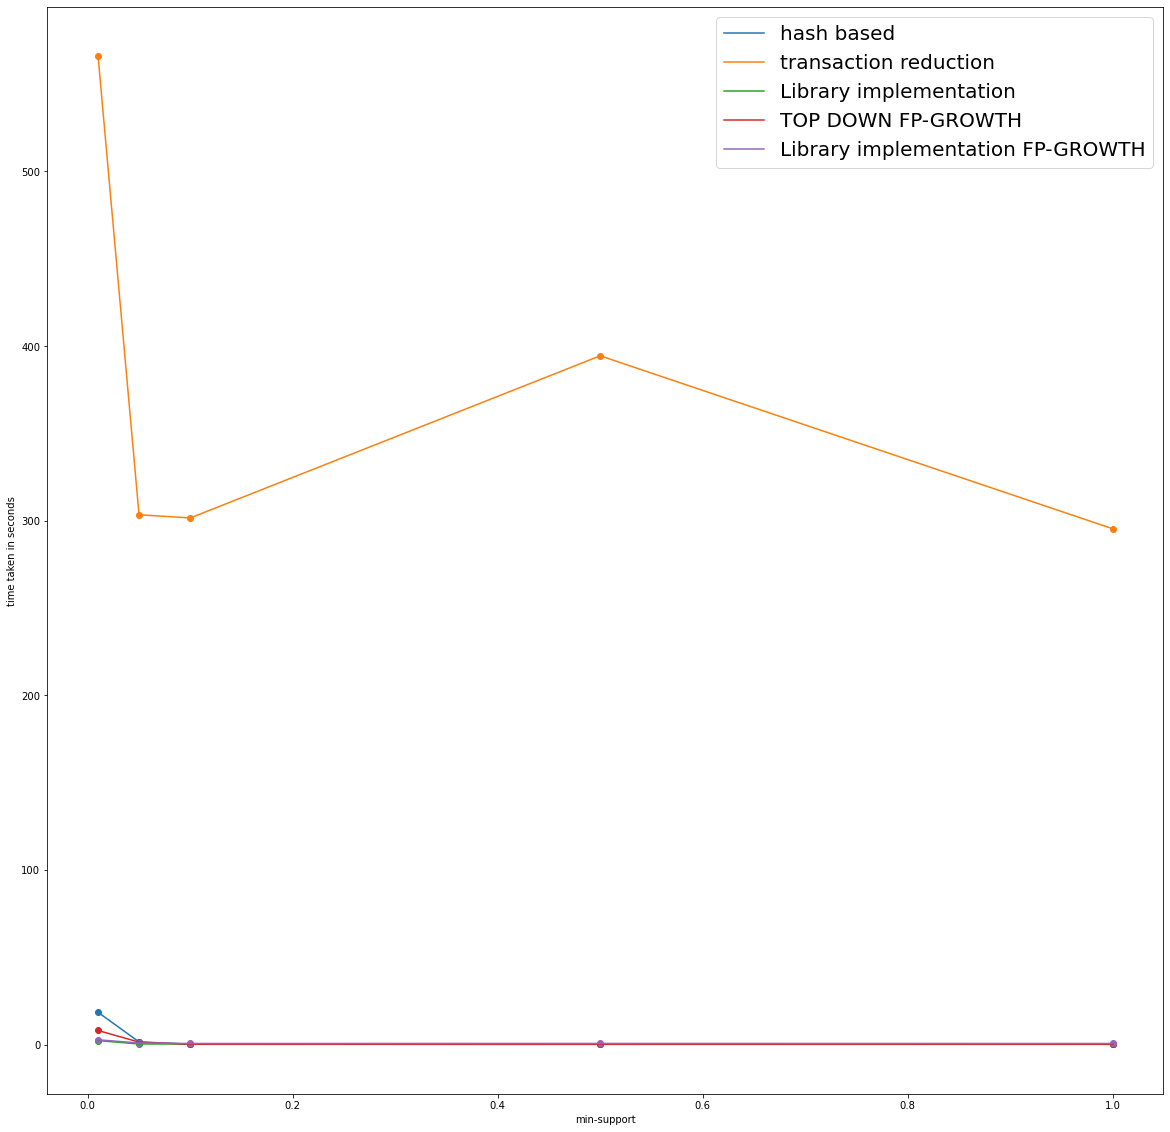

In [74]:
min_thresh=[0.01, 0.05, 0.1, 0.5, 1]

import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))


plt.plot(min_thresh,time_taken_hash,label='hash based')
plt.scatter(min_thresh,time_taken_hash)

plt.plot(min_thresh,tr_red,label='transaction reduction')
plt.scatter(min_thresh,tr_red)


plt.plot(min_thresh,library_apriori,label='Library implementation')
plt.scatter(min_thresh,library_apriori)

plt.plot(min_thresh,fp_top_down,label='TOP DOWN FP-GROWTH')
plt.scatter(min_thresh,fp_top_down)

plt.plot(min_thresh,library_fp,label='Library implementation FP-GROWTH')
plt.scatter(min_thresh,library_fp)

plt.xlabel('min-support')
plt.ylabel('time taken in seconds')
plt.legend(fontsize=20,loc="upper right")
plt.show()